<h1>Table of Contents (Clickable in sidebar)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Balancing-Statistical-confidence--with-model-simplicity" data-toc-modified-id="Balancing-Statistical-confidence--with-model-simplicity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Balancing Statistical confidence  with model simplicity</a></span></li><li><span><a href="#Processing-predictor-data" data-toc-modified-id="Processing-predictor-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing predictor data</a></span><ul class="toc-item"><li><span><a href="#Image-below-shows-download-control-panel" data-toc-modified-id="Image-below-shows-download-control-panel-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image below shows download control panel</a></span></li><li><span><a href="#Basic-code-is-explained-line-by-line-below" data-toc-modified-id="Basic-code-is-explained-line-by-line-below-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Basic code is explained line by line below</a></span></li></ul></li><li><span><a href="#The-revised-research-question" data-toc-modified-id="The-revised-research-question-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The revised research question</a></span></li><li><span><a href="#Libraries,---modules-and-orientation" data-toc-modified-id="Libraries,---modules-and-orientation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Libraries,   modules and orientation</a></span></li><li><span><a href="#Functions-Section" data-toc-modified-id="Functions-Section-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Functions Section</a></span><ul class="toc-item"><li><span><a href="#Title-function" data-toc-modified-id="Title-function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Title function</a></span></li><li><span><a href="#The-clean-function-creates-multiple-single-variable--files-acts-onexpansive-source-files" data-toc-modified-id="The-clean-function-creates-multiple-single-variable--files-acts-onexpansive-source-files-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The clean function creates multiple single variable  files acts onexpansive source files</a></span></li><li><span><a href="#Rationale-for-data-frame-reductions--and-other-EDA-decisions" data-toc-modified-id="Rationale-for-data-frame-reductions--and-other-EDA-decisions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Rationale for data frame reductions  and other EDA decisions</a></span><ul class="toc-item"><li><span><a href="#Post-2002-missing-data-beahavior" data-toc-modified-id="Post-2002-missing-data-beahavior-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Post 2002 missing data beahavior</a></span></li><li><span><a href="#Top-EU-Cattle-Stock-Countries" data-toc-modified-id="Top-EU-Cattle-Stock-Countries-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Top EU Cattle Stock Countries</a></span></li><li><span><a href="#Further-variables" data-toc-modified-id="Further-variables-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Further variables</a></span></li></ul></li></ul></li><li><span><a href="#Investigation-of-Several-Techniques-of-Visualising-the-Missing-Data" data-toc-modified-id="Investigation-of-Several-Techniques-of-Visualising-the-Missing-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigation of Several Techniques of Visualising the Missing Data</a></span></li><li><span><a href="#Nutrient-Data-Set-is-Clean" data-toc-modified-id="Nutrient-Data-Set-is-Clean-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Nutrient Data Set is Clean</a></span></li></ul></div>

##  Balancing Statistical confidence  with model simplicity

- Narrowing Countries, Time and Indepentant Variables gives a simple model with no missing values 
- Sample size: Reducing sample size  increases  the confidence.
- The sample size can still be  sufficient to provide reliable results.
- An acceptable  margin of error will be decided upon context later.
- A significance level of .05 is the aim.
- Confidence level of  95%
- Model complexity: By using simpler models with fewer parameters, the predictions may be more focused and easier to interpret 
- We will prepare a wide range of data but agressively jettison most of it during pre-processing
- Variable selection: Choosing the most relevant variables will be based on correlation
- Data quality is assured bu only using official figures
- Using the 'nutrient.csv' data to  narrow  range of data

## Processing predictor data
### Image below shows download control panel
- db [https://www.fao.org/faostat/en/#data/domains_table](https://www.fao.org/faostat/en/#data/domains_table) /Land, Inputs and Sustainability/Inputs/ Fertilizers by Nutrient
- The  image below demonstrates retrieval settings for 'Fertilizers by Nutrient' database was 
- European Union (27) > (List) 
- >1999 as per revised research question
- All 'Items' and All 'Elemement' selected for later grouping
![image1](images/beef002.png)

### Basic code is explained line by line below

# Data Wrangling   for Irish Beef 

## The revised research question
How has Ireland's beef sector performed compared to the EU 27 countries since 2000, and can we forecast future prices using this historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period? By focusing on data from 2000 onwards, we can better capture the current state of the beef industry and make more relevant predictions about future trends. 
## Libraries,   modules and orientation

In [1]:

### Data Manipulation and Analysis
import csv
import pandas as pd
import numpy as np
import fancyimpute
import missingno as msno
from functools import partial, reduce
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg
### Statistical Analysis
from scipy.stats import ks_2samp, shapiro
### Machine Learning
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
### Text Processing
import html
import re
import inflection
### Country Information
from countryinfo import CountryInfo
import pycountry
from countrygroups import EUROPEAN_UNION
### File System and OS
import glob
import os
from IPython.display import display, HTML
### Date and Time
import datetime
import time
### Data Presentation
from tabulate import tabulate
from IPython.display import HTML, Image, display

### Data Types
from typing import Dict, List, Tuple
import warnings

# Filter out the FutureWarning with the level keyword
# warnings.filterwarnings('ignore', message='Using the level keyword in DataFrame and Series aggregations is deprecated')

# Reset the warning filter to default
# warnings.filterwarnings('default')



## Functions Section

In order to tidy up the layout and reading and due to the logical nature of functions we collect them here rather than leave them scattered throughout the notepad.

"""

### Title function
The 'title' naming convention is where each word starts
with a capital letter, except for prepositions and conjunctions, which start with a lowercase letter. 
 The function takes a string as input and converts it to title case, 
where the first letter of each non-conjunction/preposition word is capitalized, 
and all other letters are lowercase.
It achieves this by splitting the input string into a list of words, -->
identifying which words are prepositions or conjunctions based on a predefined list, 
nd then capitalizing the first letter of all other words while converting prepositions 
nd conjunctions to lowercase. The resulting list of processed words is then joined back into a
single string with proper spacing and returned.

"""

In [2]:

def title(sentence):
    """
    Takes a string and converts it to title case, where the first letter of each
    non-conjunction/preposition word is capitalized, and all other letters are lowercase.
    
    Args:
        sentence (str): The string to convert to title case.
        
    Returns:
        str: The input string converted to title case.
    """
    # Define a list of common prepositions and conjunctions
    prepositions_conjunctions = ['a', 'this', 'an', 'the', 'and', 'but', 'or', 'for', 'has', 'nor', 'on', 'at', 'to', 'from', 'by', 'over', 'under', 'in', 'out', 'of']
    # Split the input string into a list of words
    words = sentence.split()
    processed_words = []
    for word in words:
        # If the word is not a preposition or conjunction, capitalize the first letter and lowercase the rest
        if word.lower() not in prepositions_conjunctions:
            processed_words.append(word.capitalize())
        # If the word is a preposition or conjunction, convert to lowercase
        else:
            processed_words.append(word.lower())
    # Join the list of processed words into a single string, with proper spacing
    output = " ".join(processed_words)
    # Remove any leading/trailing whitespace and add some padding
    return "     " + re.sub('\s+', ' ', output.strip()) + "     "



In [3]:

def snake(text, default='default'):
    """
    Converts a given string to snake_case by replacing any whitespace characters with underscores,
    converting to all lowercase, and removing any non-alphanumeric characters from the beginning and end.

    Parameters:
        text (str): The string to convert to snake_case.
        default (str): The default value to return if the input text is empty.

    Returns:
        str: The resulting string in snake_case format, or the default value if the input text is empty.
    """
    if not text:
        return default
    # Convert to string and replace any non-alphanumeric characters at the beginning and end with an empty string
    text = re.sub(r'^\W+|\W+$', '', str(text))
    # Replace any period symbols with underscores
    text = text.replace('.', '')
    # Replace any other non-alphanumeric characters with empty strings
    text = re.sub(r'\W+', '_', text)
    # Convert to all lowercase
    text = text.lower()
    return text

# Example usage:
text = "This is a text with pe,  ,  ,  ,riods. (And other characters   .)"
result = snake(text)
print(result)  # Output: "this_is_a_text_with_periods_and_other_characters"


this_is_a_text_with_pe_riods_and_other_characters


In [4]:
def clean(file_path):
 

    # Rename the 'Area' column to 'Country'
    df = df.rename(columns={'Area': 'Country'})

    
    df = df[~df['Country'].isin(countries_to_drop)]
    df = df[~df['Element'].isin(elements_to_drop)]
    df = df[df['Year'] >= 2002]
    df = df[['Country', 'Year', 'Element', 'Item', 'Value']]

    # Filter for year >= 2002


    # Create a 'Key' column by concatenating 'Country' and 'Year'
    df['Key'] = df['Country'] + df['Year'].astype(str)

    # Convert values in the Item and Element columns to clean snake
    df['Item'] = df['Item'].apply(snake)
    df['Element'] = df['Element'].apply(snake)

    # Generate item and element lists
    item_df = df['Item'].unique()
    element_df = df['Element'].unique()

    # Create separate dataframes for each combination of Element and Item
    df_names = []
    combinations = df[['Element', 'Item']].drop_duplicates()
    for i, row in combinations.iterrows():
        # Get the current combination of Element and Item
        e = row['Element']
        it = row['Item']    
        # Create a DataFrame for the current combination
        df_name = f"{e}_{it}_df"
        globals()[df_name] = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)
        df_names.append(df_name)


    # Return the list of dataframe names
    return df_names


In [5]:
def cleanraw(df):
    # Rename the 'Area' column to 'Country'
    df = df.rename(columns={'Area': 'Country'})
    # Filter out specified countries and keep required columns
    countries_to_drop = ['Belgium-Luxembourg','Austria', 'Malta', 'Bulgaria', 'Slovakia', 'Netherlands', 'Latvia']
    elements_to_drop
    df = df[~df['Country'].isin(countries_to_drop)]
    df = df[['Country', 'Year', 'Element', 'Item', 'Value']]
    df['Key'] = df['Country'] + df['Year'].astype(str)
        # Convert values in the Item and Element columns to clean snake
    df['Item'] = df['Item'].apply(snake)
    df['Element'] = df['Element'].apply(snake)
    return df

In [ ]:
os.

In [73]:
# Filter out specified countries and keep required columns
countries_to_drop = ['Belgium-Luxembourg', 'Austria', 'Malta', 'Bulgaria', 'Slovakia', 'Netherlands', 'Latvia']
countries_to_keep=[]
elements_to_drop=['Production']
elements_to_drop
countries_to_drop

['Belgium-Luxembourg',
 'Austria',
 'Malta',
 'Bulgaria',
 'Slovakia',
 'Netherlands',
 'Latvia']

In [74]:
os.listdir('clean')

['arch',
 'areas.npy',
 'AreasEU.csv',
 'beluxPivot.csv',
 'beneluxPivot.csv',
 'beneluxPivot.npy',
 'benelux_pivot.csv',
 'cattle_stocks.csv',
 'missing.csv',
 'missing.npy',
 'nutrient2002',
 'nutrient2002.csv',
 'orderedstock.csv',
 'rain.csv',
 'stock.csv',
 'stock_cckp.csv',
 'temperature.csv',
 'topstock.txt',
 'top_10_countries_stock.csv',
 'top_countries.txt',
 'top_countries_stock.csv']

In [75]:
# Open the file for reading
with open('clean/topstock.txt', 'r') as file:
    # Read the contents of the file
    file_contents = file.read()
    # Print the contents to the console
    print(file_contents)

France
Germany
Ireland
Spain
Italy
Poland
Netherlands
Belgium



"""
### The clean function creates multiple single variable  files acts onexpansive source files
-   Reads a CSV file located at file_path into a pandas DataFrame
-   Renames the column named 'Area' to 'Country' in the DataFrame
-   Filters out specified countries and retains only required columns
-   Filters for years greater than or equal to 2002
-   Creates a new column named 'Key' by concatenating the 'Country' and 'Year' columns
-   Converts values in the 'Item' and 'Element' columns to snake case
-   Generates unique lists of items and elements in the DataFrame
-   Creates separate DataFrames for each combination of element and item
-   Returns the final DataFrame
-   Specifically, the function performs the following steps

Regenerate response

"""

In [69]:
df=pd.read_csv('raw/nutrient.csv')
df =df.apply(cleanraw)
    # Convert values in the Item and Element columns to clean snake
df['Item'] = df['Item'].apply(snake)
df['Element'] = df['Element'].apply(snake)


# Get the unique values for each column

TypeError: rename() got an unexpected keyword argument 'columns'

In [70]:
area_df = df['Area'].unique()
element_df = df['Element'].unique()
item_df = df['Item'].unique()
year_df = df['Year'].unique()
print(item_df)
print(element_df)
print(area_df)
print(year_df)

['Nutrient nitrogen N (total)' 'Nutrient phosphate P2O5 (total)'
 'Nutrient potash K2O (total)']
['Production' 'Import Quantity' 'Export Quantity' 'Agricultural Use']
['Austria' 'Belgium' 'Belgium-Luxembourg' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden']
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


In [71]:
cleanraw(df)

,Country,Year,Element,Item,Value,Key
228,Belgium,2002,production,nutrient_nitrogen_n_total,790000.0,Belgium2002
229,Belgium,2003,production,nutrient_nitrogen_n_total,790000.0,Belgium2003
230,Belgium,2004,production,nutrient_nitrogen_n_total,840200.0,Belgium2004
231,Belgium,2005,production,nutrient_nitrogen_n_total,922600.0,Belgium2005
232,Belgium,2006,production,nutrient_nitrogen_n_total,958600.0,Belgium2006
...,...,...,...,...,...,...
6379,Sweden,2016,agricultural_use,nutrient_potash_k2o_total,35077.0,Sweden2016
6380,Sweden,2017,agricultural_use,nutrient_potash_k2o_total,36791.0,Sweden2017
6381,Sweden,2018,agricultural_use,nutrient_potash_k2o_total,38985.0,Sweden2018
6382,Sweden,2019,agricultural_use,nutrient_potash_k2o_total,36070.0,Sweden2019


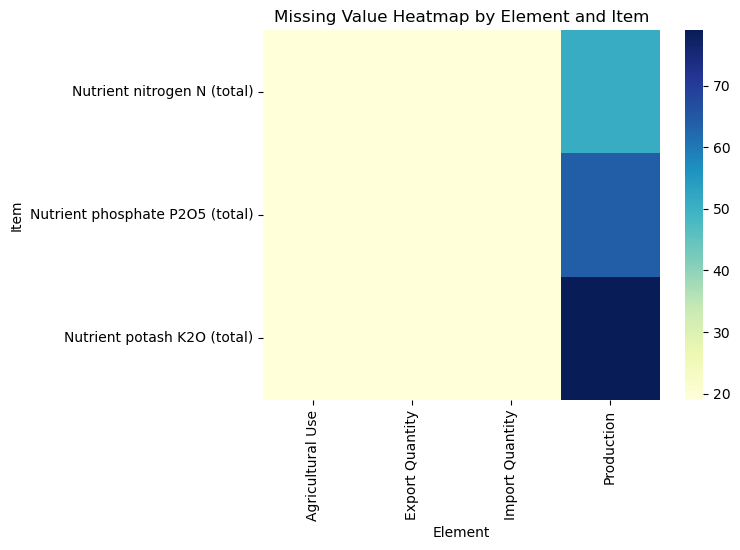

In [62]:

# create a pivot table with the Item as the index and Element as the columns
pivot_df = pd.pivot_table(df, index='Item', columns='Element', values='Value', aggfunc=lambda x: x.isnull().sum())

# create a heatmap with Element and Item
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Missing Value Heatmap by Element and Item')
plt.show()



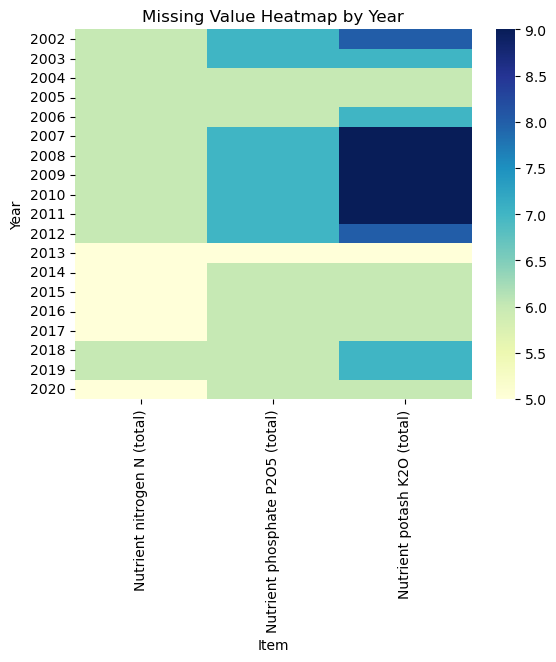

In [63]:
df = df[df['Element'] != 'production']

# create a pivot table with the Year as the index and Item as the columns
pivot_df = pd.pivot_table(df, index='Year', columns='Item', values='Value', aggfunc=lambda x: x.isnull().sum())

# create a heatmap with year and item
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Missing Value Heatmap by Year')
plt.show()


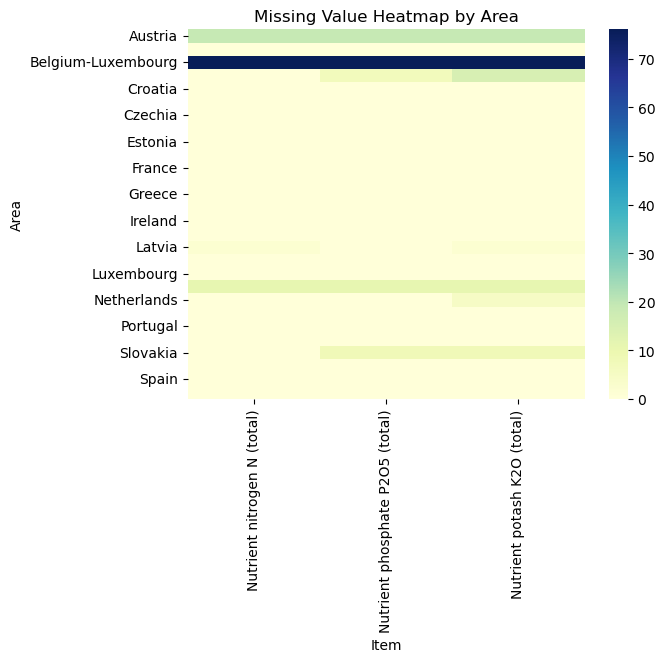

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a pivot table with the Area as the index and Item as the columns
pivot_df = pd.pivot_table(df, index='Area', columns='Item', values='Value', aggfunc=lambda x: x.isnull().sum())

# create a heatmap with area and item
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Missing Value Heatmap by Area')
plt.show()


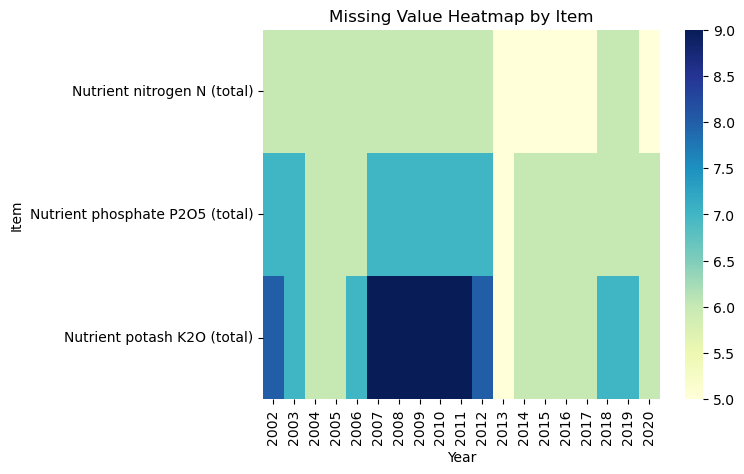

In [65]:

# create a pivot table with the Item as the index and Year as the columns
pivot_df = pd.pivot_table(df, index='Item', columns='Year', values='Value', aggfunc=lambda x: x.isnull().sum())

# create a heatmap with Item and Year
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Missing Value Heatmap by Item')
plt.show()


In [41]:
# Identify missing or incorrect values
print(df.isnull().sum())
print(df.describe())

# Remove or impute missing values
df.dropna(inplace=True)  # remove rows with missing values
df.fillna(df.mean(), inplace=True)  # impute missing values with the mean

# Remove or correct incorrect values
df = df[df['Value'] >= 0]  # remove rows with negative nutrient amounts
df['Value'] = df['Value'].abs()  # correct negative nutrient amounts

# Verify the results
print(df.isnull().sum())
print(df.describe())

['nutrient_nitrogen_n_total' 'nutrient_phosphate_p2o5_total'
 'nutrient_potash_k2o_total']
['production' 'import_quantity' 'export_quantity' 'agricultural_use']
['Austria' 'Belgium' 'Belgium-Luxembourg' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden']
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]
Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code             0
Item                  0
Year Code             0
Year                  0
Unit                365
Value               365
Flag                365
Flag Description    365
dtype: int64
       Area Code (M49)  Element Code    Item Code    Year Code         Year  \
count      6384

C:\Users\ronan\AppData\Local\Temp\ipykernel_5732\2956287417.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # impute missing values with the mean


In [ ]:
missing_groups = nutrient_df.groupby(['Area', 'Element', 'Item', 'Year']).size().loc[lambda x: x == 0]
print(missing_groups)

In [ ]:
# read in the nutrient_df DataFrame
nutrient_df = pd.read_csv('nutrient_data.csv')

In [10]:
clean('raw/nutrient.csv')


UnboundLocalError: local variable 'df' referenced before assignment

In [ ]:
main_df

In [ ]:
for var in dir():
    if isinstance(eval(var), pd.core.frame.DataFrame):
        print(var)


In [ ]:
import_quantity_nutrient_potassium_k2o_equiv_df


In [ ]:
prodN = production_nutrient_nitrogen_n_total_df
impN = import_quantity_nutrient_nitrogen_n_total_df
prodK = production_nutrient_potash_k2o_total_df
expN = export_quantity_nutrient_nitrogen_n_total_df
agN = agricultural_use_nutrient_nitrogen_n_total_df
agP = agricultural_use_nutrient_phosphate_p2o5_total_df
agK = agricultural_use_nutrient_potash_k2o_total_df

In [ ]:
# Merge prodN with main_df
main_df = main_df.merge(prodN[['Key', 'Value']], on='Key', how='left')

# Rename the 'Value' column to 'prodN'
main_df = main_df.rename(columns={'Value': 'prodN'})
main_df


In [ ]:
production_nutrient_nitrogen_n_total_df

In [ ]:
def merge_df(df_name, merge_key, value_key):
    # Load the specified dataframe from the Excel file and rename the "Value" column to the value_key
    df = pd.read_excel('data/Data_Extract_From_FAOSTAT.xlsx', sheet_name=df_name)
    df = df.rename(columns={'Value': value_key})
    
    # Merge the specified dataframe with the global main_df dataframe, and rename the merged column to include the value_key
    global main_df
    main_df = pd.merge(main_df, df[[merge_key, value_key]], on=merge_key)
    main_df = main_df.rename(columns={value_key: f'{df_name}_{value_key}'})


In [ ]:
def merge_all_dfs():
    # Define the list of dataframe names to merge
    df_names = ['production_nutrient_nitrogen_n_total', 'production_nutrient_phosphate_p2o5_equiv',
                'production_nutrient_potassium_k2o_equiv', 'agri_environmental_accounts_nitrogen_n_total',
                'agri_environmental_accounts_phosphate_p2o5_equiv', 'agri_environmental_accounts_potassium_k2o_equiv',
                'import_quantity_nutrient_nitrogen_n_total', 'import_quantity_nutrient_phosphate_p2o5_equiv',
                'import_quantity_nutrient_potassium_k2o_equiv', 'export_quantity_nutrient_nitrogen_n_total',
                'export_quantity_nutrient_phosphate_p2o5_equiv', 'export_quantity_nutrient_potassium_k2o_equiv']
    
    # Merge each dataframe in the list using the 'Area Code' column as the key
    for df_name in df_names:
        value_key = df_name.split('_')[-1]  # Extract the nutrient name from the dataframe name
        merge_df(df_name, 'Area Code', f'{df_name}_{value_key}')


In [ ]:
main_df

In [ ]:
# Define a dictionary with keys as dataframe names and values as nutrient names
nutrient_dict = {
    'production_nutrient_nitrogen_n_total_df': 'ProdN',
    'import_quantity_nutrient_potassium_k2o_equiv_df': 'ImpK',
    'export_quantity_nutrient_potassium_k2o_equiv_df': 'ExpK',
    'production_nutrient_phosphate_p2o5_equiv_df': 'ProdP',
    'import_quantity_nutrient_nitrogen_n_total_df': 'ImpN',
    'export_quantity_nutrient_nitrogen_n_total_df': 'ExpN',
    'production_nutrient_potassium_k2o_equiv_df': 'ProdK',
    'import_quantity_nutrient_phosphate_p2o5_equiv_df': 'ImpP',
    'export_quantity_nutrient_phosphate_p2o5_equiv_df': 'ExpP',
    'production_nutrient_nitrogen_n_total_org_df': 'ProdNO',
    'import_quantity_nutrient_potassium_k2o_equiv_org_df': 'ImpKO',
    'export_quantity_nutrient_potassium_k2o_equiv_org_df': 'ExpKO',
    'production_nutrient_phosphate_p2o5_equiv_org_df': 'ProdPO',
    'import_quantity_nutrient_nitrogen_n_total_org_df': 'ImpNO',
    'export_quantity_nutrient_nitrogen_n_total_org_df': 'ExpNO',
    'production_nutrient_potassium_k2o_equiv_org_df': 'ProdKO',
    'import_quantity_nutrient_phosphate_p2o5_equiv_org_df': 'ImpPO',
    'export_quantity_nutrient_phosphate_p2o5_equiv_org_df': 'ExpPO'
}

# Define a function to merge the specified dataframe into the main_df
def merge_df(df_name, merge_key, nutrient_key):
    # Load the specified dataframe and rename the "Value" column to the nutrient_key
    df = globals()[df_name].rename(columns={'Value': nutrient_key})
    # Merge the specified column into the main_df
    main_df[merge_key] = main_df[merge_key].astype(str)
    df[merge_key] = df[merge_key].astype(str)
    merged_df = pd.merge(main_df, df[[merge_key, nutrient_key]], on=merge_key, how='left')
    return merged_df


# Merge each dataframe into the main_df using the dictionary
for df_name, nutrient_key in nutrient_dict.items():
    merge_key = 'Key'
    main_df = merge_df(df_name, merge_key, nutrient_key)


In [ ]:
main_df

In [ ]:
main_df

In [ ]:
# Read in the original/source/raw DataFrame
df = pd.read_csv('raw/nutrient.csv')
# filter for time
df = df[df['Year'] >= 2000]
# remove  "Belgium-Luxembourg" based on 01...ijpnb decision
df = df[df['Area'] != 'Belgium-Luxembourg']
# rename the 'Area' column to 'Country' 
df = df.rename(columns={'Area': 'Country'})
# create a 'Key' column by concatenating 'Country' and 'Year'
df['Key'] = df['Country'] + df['Year'].astype(str)
# keep required varient columns
df = df[['Country','Year','Element','Item', 'Value','Key']]
# Convert  values in the Item  and Element columns to clean snake
df['Item'] = df['Item'].apply(snake)
df['Element'] = df['Element'].apply(snake)
# Generate item and element lists as per image above
item_df=df['Item'].unique()
element_df = df['Element'].unique()
# Print several objects for critical thinking and EDA
print(df.columns)
print(df['Element'].unique())
print(df['Item'].unique())
# print the final dataframe
df.head()

In [ ]:

# get the unique combinations of Element and Item
combinations = df[['Element', 'Item']].drop_duplicates()
# loop through all combinations of Element and Item
for i, row in combinations.iterrows():
    # get the current combination of Element and Item
    e = row['Element']
    it = row['Item']    
    # create a DataFrame for the current combination
    df_name = f"{e}_{it}_df"
    globals()[df_name] = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)


In [ ]:
# Calculate the number of missing values for each country and year
missing_values = df.groupby(['Country', 'Year'])['Value'].apply(lambda x: x.isna().sum())
# Reshape the data to a pivot table for plotting
missing_values = missing_values.unstack('Country')


In [ ]:


# Get the dictionary of all global variables
global_vars = globals()

# Filter the dictionary to show only dataframe objects
df_dict = {k:v for k,v in global_vars.items() if isinstance(v, pd.DataFrame) and k.endswith('_df')}

# # Print the dictionary of dataframes
# print(df_dict)

# Print the list of dataframe names
print(list(df_dict.keys()))


### Rationale for data frame reductions  and other EDA decisions


- Decision to drop 2000, 2001 and 2002 is based on heatmap below
- A visual inspection of missing data shows almost all countries in our sample have disproportionate levels of missing data in 2000 and 2001
- That is why 2000 and 2001 are cut



Verification  and Culling countries

A visual inspection now suggest we drop the 

#### Post 2002 missing data beahavior
- Post 2002 missing data beahavior is exclusive to these 5 countries
- This is an ordered list
- Austria had the most missing data
- The Netherlands the least

| Index | Country     |
|-------|-------------|
| 1     | Austria     |
| 2     | Malta       |
| 3     | Bulgaria    |
| 4     | Slovakia    |
| 5     | Netherlands |
| 6     | Latvia      |

- Strategy solves a missing data problem 
- While meeting project aim to jettison data
- We see the Netherlands is 7th in the average stock league table 
- We could simply remove it 
- or we could simplify the project greatly and narrow our research question to the top 6 producers?
- The ML stage will infor this

#### Top EU Cattle Stock Countries

| Index | Country      |
|-------|--------------|
| 1     | France       |
| 2     | Germany      |
| 3     | Ireland      |
| 4     | Spain        |
| 5     | Italy        |
| 6     | Poland       |
| 7     | Netherlands  |
| 8     | Belgium      |

####  Further variables

- Here we only looked at the Soil Nutrient data 
- From it we decided to remove 2000 and 2001 
- Furthermore we removed 6 countries including the 7th in the stock league tables the Netherlands
- We may narrow our zone of interest further but will import and grow our main data file based on the YearCountry merging key and unique Element Item combos
- Finally we will keep the headers painfully abreviated but generate a data dictionary for clarity of communifiaction

## Investigation of Several Techniques of Visualising the Missing Data     


In [ ]:
# Heatmap of missing values
sns.heatmap(missing_values, cmap='Blues')
plt.title('Missing Nutrient Values by Country and Year Heatmap')
print(Title('Missing Nutrient Values by Country and Year Heatmap'))
plt.show()

In [ ]:
# Missing value count by year
missing_by_year = missing_values.sum(axis=1)
plt.plot(missing_by_year.index, missing_by_year.values)
plt.title('Line Plot of Missing Nutrient Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

In [ ]:

# Calculate the number of missing values for each country and year
missing_values = df.groupby(['Country', 'Year'])['Value'].apply(lambda x: x.isna().sum())
# Reshape the data to a pivot table for plotting
missing_values = missing_values.unstack('Country')
# Get the top 8 countries with the most missing values
top_countries = missing_values.sum().sort_values(ascending=False)[:8].index
# Stack the missing values and reset the index
missing_values_stacked = missing_values[top_countries].stack().reset_index()
missing_values_stacked.columns = ['Year', 'Country', 'Missing Values']
# Line plot of missing values
sns.lineplot(data=missing_values_stacked, x='Year', y='Missing Values', hue='Country')
plt.title('Distribution of Missing Values by Country and Year')
plt.show()

In [ ]:
# Density plot of missing values by year
sns.kdeplot(missing_by_year, shade=True)
plt.title('Density Plot of Missing Values by Year')
plt.xlabel('Number of Missing Values')
plt.show()

In [ ]:
# Read in the CSV file as a Pandas DataFrame
df = pd.read_csv('clean/nutrient2002.csv')
print(df.shape)
# List of excluded countries
excluded_countries = ['Austria', 'Malta', 'Bulgaria', 'Slovakia', 'Netherlands','Latvia']
# Keep only the excluded countries in the DataFrame
df = df[df['Country'].isin(excluded_countries)]

In [ ]:
df=cleanraw('raw/nutrient.csv')
df.head()

## Nutrient Data Set is Clean

In [ ]:

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values in Nutrient Dataset')
plt.show()


In [ ]:
# df = pd.read_csv('raw/manure.csv')
rawfiles = os.listdir('raw')
rawfiles

In [ ]:
# Call the clean() function with a file path and assign the results to several df variables
df = clean('raw/nutrient.csv')

In [ ]:
main_df

In [ ]:
df2=production_nutrient_nitrogen_n_total_df
df2

In [ ]:
# Merge two dataframes and rename the column at the same time
main_df = main_df.merge(df2[['Key', 'Value']].rename(columns={'Value': 'ProdN'}), on='Key')

main_df

In [ ]:
# List of global variables in your script 
globals_vars = list(globals().keys())

# Filter the list to include only the dataframes created by the clean() function
df_names = [var for var in globals_vars if isinstance(globals()[var], pd.DataFrame) and var.endswith('_df')]

# Print the list of dataframe names
print(df_names)
df_names

In [ ]:
# # Get a list of all the global variables in your script
# global_vars = list(globals())

# # Delete all dataframes created by the clean() function
# for var in global_vars:
#     if isinstance(globals()[var], pd.DataFrame) and var.endswith('_df'):
#         del globals()[var]

In [ ]:
# [del globals()[var] for var in list(globals()) if isinstance(globals()[var], pd.DataFrame) and var.endswith('_df')]


In [ ]:
clean

In [ ]:
   df = pd.read_csv('raw/LivestockPatterns.csv')


In [ ]:
production_nutrient_phosphate_p2o5_total_df

In [ ]:
clean('raw/LivestockPatterns.csv')

In [ ]:
# def prep(file_path):
#     # Read in the CSV file as a Pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Filter for years 2002 and later
#     df = df[df['Year'] >= 2002]
    
#     # Remove excluded countries
#     excluded_countries = ['Austria', 'Malta', 'Bulgaria', 'Slovakia', 'Netherlands', 'Latvia','Belgium-Luxembourg']
#     df = df[~df['Area'].isin(excluded_countries)]
    
#     # Rename the 'Area' column to 'Country'
#     df = df.rename(columns={'Area': 'Country'})
    
#     # Create a 'Key' column by concatenating 'Country' and 'Year'
#     df['Key'] = df['Country'] + df['Year'].astype(str)
    
#     # Keep required columns
#     df = df[['Country', 'Year', 'Element', 'Item', 'Value', 'Key']]
    
#     # Convert Item and Element columns to snake case
#     df['Item'] = df['Item'].apply(snake)
#     df['Element'] = df['Element'].apply(snake)
    
#     # Create dictionary of dataframes for each combination of Element and Item
#     df_dict = {}
#     for element, item in zip(df['Element'], df['Item']):
#         element_item_key = f"{element}||{item}"
#         if element_item_key not in df_dict:
#             df_dict[element_item_key] = df[(df['Element'] == element) & (df['Item'] == item)].reset_index(drop=True)
    
#     return df_dict


In [ ]:
prep('raw/manure.csv')

In [ ]:



# get the unique combinations of Element and Item
combinations = df[['Element', 'Item']].drop_duplicates()

# loop through all combinations of Element and Item
for i, row in combinations.iterrows():
    # get the current combination of Element and Item
    e = row['Element']
    it = row['Item']
    
    # create a DataFrame for the current combination
    df_name = f"{e}_{it}_df"
    globals()[df_name] = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)

# print a list of the DataFrames created
df_list = [var for var in globals() if var.endswith('_df')]
df_list


In [ ]:
def dataframes(file_path):
    # Read in the CSV file as a Pandas DataFrame
    df = pd.read_csv(file_path)

    # Get the unique combinations of Element and Item
    combinations = df[['Element', 'Item']].drop_duplicates()

    # Create a dictionary of dataframes for each combination of Element and Item
    df_dict = {}
    for i, row in combinations.iterrows():
        e = row['Element']
        it = row['Item']
        key = f"{e}_{it}"
        df_dict[key] = df[(df['Element'] == e) & (df['Item'] == it)]

    return df_dict



In [ ]:
os.listdir('raw')

In [ ]:
dataframes('raw/land_pasture.csv')

In [ ]:
df.shape

In [ ]:
# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values in Nutrient Dataset')
plt.show()

In [ ]:
production_nutrient_nitrogen_n_total_df

In [ ]:


# # Define a function to create a new DataFrame for a given group
# def create_df(group):
#     element_name = group['Element'].iloc[0]
#     item_name = group['Item'].iloc[0]
#     new_df = group.copy()
#     new_df['Element'] = element_name
#     new_df['Item'] = item_name
#     new_df.columns = [inflection.underscore(col) for col in new_df.columns] # rename columns to snake_case
#     df_name = f'{inflection.underscore(element_name)}_{inflection.underscore(item_name)}'
#     return df_name, new_df

# # Group the original dataframe by Element and Item, and loop through the resulting groups to create new DataFrames
# dfs = {}
# for (element, item), group in df.groupby(['Element', 'Item']):
#     df_name, new_df = create_df(group)
#     dfs[df_name] = new_df

# # Print the resulting DataFrames
# for name, df in dfs.items():
#     print(name)
# df

In [ ]:
dfs[1]

In [ ]:
# Group the DataFrame by 'Element' and 'Item'
groups = df.groupby(['Element', 'Item'])

In [ ]:
# Group the DataFrame by Element and Item
grouped = nutrient_df.groupby(['Element', 'Item'])

In [ ]:
for name, group in groups:
    element, item = name
    filename = f"{element}_{item}.csv"
    group.to_csv(filename, index=False)

In [ ]:
# Loop over each group and create a new DataFrame for each
for name, group in grouped:
    # Create a new DataFrame using the group
    new_df = pd.DataFrame(group)

In [ ]:
# Create an empty dictionary to store the new DataFrames
dfs = {}

# Loop over each group and create a new DataFrame for each
for name, group in grouped:
    # Create a new DataFrame using the group
    new_df = pd.DataFrame(group)
    
    # Get the names of the Element and Item for this group
    element_name = name[0]
    item_name = name[1]
    
    # Create a unique name for this new DataFrame
    df_name = f'{element_name}_{item_name}_df'
    
    # Store the new DataFrame in the dictionary
    dfs[df_name] = new_df

dfs['Nitrogen_Fertilizers_df']

In [ ]:
    
    # Do EDA on the new DataFrame as desired
    # ...
    
    # Store the new DataFrame however you like (e.g. in a dictionary)
    # ...

In [ ]:
# Group by country and item and calculate the mean value
df_grouped = dfs['Production_Crops_Economic'].groupby(['Area', 'Item']).mean()

# Print the first 5 rows
print(df_grouped.head())


In [ ]:
"""We will bring in another predictor manually before automating
The unwanted area and years are filtered out by the process Next  LandCover """
os.listdir('./raw') 

predictor variables to include in the analysis.
-  production volume
- imports
- exports and 
- slaughter numbers.

In [ ]:
import pandas as pd

def read_data(file_path):
    # Read in the data
    df = pd.read_csv(file_path)
    return df

def clean_column_names(df):
    # Replace forward slashes, backslashes, and commas in column names with underscores
    df.columns = df.columns.str.replace('[/\\\\, (,) ,=  ]', '_')
    return df

def clean_element_item_values(df):
    # Replace forward slashes, backslashes, commas, periods, and hyphens in Element and Item values with underscores
    df['Element'] = df['Element'].str.replace('[/\\\\, (,) , =  ]', '_')
    df['Item'] = df['Item'].str.replace('[/\\\\, (,), =   -\.]', '_')
    return df


def drop_rows(df):
    # Drop rows where Area is 'Belgium-Luxembourg'
    df = df[df['Area'] != 'Belgium-Luxembourg']
    return df

def generate_key_column(df):
    # Merge Area and Year columns into a new Key column
    df['Key'] = df['Area'] + '_' + df['Year'].astype(str)
    return df

def filter_dataframes(df):
    # Generate a list of dataframes, with each dataframe filtered by Element and Item
    dfs = []
    for element in df['Element'].unique():
        for item in df['Item'].unique():
            element_item_df = df[(df['Element'] == element) & (df['Item'] == item)]
            if not element_item_df.empty:
                # Replace spaces and decimal points with underscores in dataframe names
                element_item_name = element.replace(' ', '_').replace('.', '_') + '_' + item.replace(' ', '_').replace('.', '_') + '_df'
                dfs.append(element_item_name)
                # Replace spaces and decimal points with underscores in dataframe variable names
                exec(element_item_name.replace(' ', '_').replace('.', '_') + ' = element_item_df')

    # Debugging line: print out the list of dataframe names
    print(dfs)
    
    # Return a dictionary of the dataframes
    return {name: globals()[name] for name in dfs}


def preprocess_data(file_path):
    df = read_data(file_path)
    df = drop_rows(df)
    df = clean_column_names(df)
    df = clean_element_item_values(df)
    return filter_dataframes(df)

#     df = generate_key_column(df)

In [ ]:


# Group by element and item and calculate the mean value
df_grouped = dfs['Production_Crops_Economic'].groupby(['Area', 'Item']).mean()

# Print the first 5 rows
print(df_grouped.head())


In [ ]:
dfs = preprocess_data('raw/nutrient.csv')
print(dfs.keys())

In [ ]:
Yield_Carcass_Weight_Beef_and_Buffalo_Meat__primary_df


In [ ]:
dfs = preprocess_data('raw/beefandbuffalo.csv')
print(dfs.keys())  # prints a list of the names of the processed dataframes


In [ ]:
Yield_Carcass_Weight_Meat_of_cattle_with_the_bone__fresh_or_chilled_df

In [ ]:

def preprocess_data(file_path):
    # Read in the data
    df = pd.read_csv(file_path)

    # Replace forward slashes, backslashes, and commas in column names with underscores
    df.columns = df.columns.str.replace('[/\\\\, ]', '_')

    # Replace forward slashes, backslashes, and commas in Element and Item values with underscores
    df['Element'] = df['Element'].str.replace('[/\\\\, ]', '_')
    df['Item'] = df['Item'].str.replace('[/\\\\, ]', '_')

    # Drop rows where Area is 'Belgium-Luxembourg'
    df = df[df['Area'] != 'Belgium-Luxembourg']

    # Merge Area and Year columns into a new Key column
    df['Key'] = df['Area'] + '_' + df['Year'].astype(str)

    # Generate a list of dataframes, with each dataframe filtered by Element and Item
    dfs = []
    for element in df['Element'].unique():
        for item in df['Item'].unique():
            element_item_df = df[(df['Element'] == element) & (df['Item'] == item)]
            if not element_item_df.empty:
                # Replace spaces with underscores in dataframe names
                element_item_name = element + '_' + item.replace(' ', '_') + '_df'
                dfs.append(element_item_name)
                # Replace spaces with underscores in dataframe variable names
                exec(element_item_name.replace(' ', '_') + ' = element_item_df')

    # Return a dictionary of the dataframes
    return {name: globals()[name] for name in dfs}


In [ ]:
YiCaMe_df=Yield_Carcass_Weight_Meat_of_cattle_with_the_bone__fresh_or_chilled_df

YiCaMe_df


In [ ]:
beefandbuffalo_df = pd.read_csv( 'raw/beefandbuffalo.csv', on_bad_lines='skip')   # loads Land USe Domain
beefandbuffalo_df.head(5)

In [ ]:
dfs = create_dfs(beefandbuffalo_df)
df_names = [name for name, _ in dfs]
df_names

In [ ]:
Producing_Animals_Slaughtered_Beef_and_Buffalo_Meat__primary_df.head()

In [ ]:
df_list = group_by_element_item(beefandbuffalo_df)

# loop over the list and print the name of each dataframe and its first few rows
for i, df in enumerate(df_list):
    print(f"Dataframe {i}: {df.columns[0]} - {df.columns[1]}")
    print(df.head())
    print()


In [ ]:
Dataframe 1

In [ ]:
# iterate over the groups and create new dataframes
for group_name, group_data in grouped_df:
    # create a new dataframe with the group data
    new_df = group_data.copy()

    # append the new dataframe to the list
    df_list.append(new_df)

    # print the first few rows of the new dataframe
    print("New dataframe created: ", group_name)
    new_df.head()

In [ ]:
Production=df_list[1]
Production
# assuming the dataframe is called 'Production'
unique_items = Production['Item'].unique()
print(unique_items)

In [ ]:
# 
grouped_df = beefandbuffalo_df.groupby('Element')

In [ ]:
# iterate over the groups and create new dataframes
for group_name, group_data in grouped_df:
    # create a new dataframe with the group data
    new_df_name = group_name + "_df"
    locals()[new_df_name] = group_data

In [ ]:
# assuming the original dataframe is called 'df'
grouped_df = df.groupby('Element')
df_list = []

In [ ]:
    # print the first few rows of the new dataframe
    print("New dataframe created: ", new_df_name)
    print(locals()[new_df_name].head())

In [ ]:


def filters(df):
    # Delete the "Belgium-Luxembourg" column
    if "Belgium-Luxembourg" in df.columns:
        df = df.drop("Belgium-Luxembourg", axis=1)

    # Filter the "Year" column to only include years greater than or equal to 2000
    df = df[df["Year"] >= 2000]

    return df


In [ ]:
# Get a list of unique countries from the "Area" column
countries = df['Area'].unique()
countries

In [ ]:
# count the number of missing values in each column
missing_values = df.isnull().sum()

# print the result
print(missing_values)

In [ ]:
# Count the number of areas with missing values
num_missing_areas = df['Area'][df.isna().any(axis=1)].nunique()

# Print the result
print("The number of areas with missing values is:", num_missing_areas)


In [ ]:
31900/1708 # 20% data is missing

In [ ]:
df.shape    

In [ ]:
snake('Distribution of Missing Values by Area')

In [ ]:
snake('msno.matrix(df)')

In [ ]:
msno.matrix(df)

In [ ]:
# create a bar chart of the missing value counts by year
plt.figure(figsize=(20,8))  # increase the figure size for better readability
ax = year_counts.plot(kind='bar')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.title('Distribution of Missing Values by Year', fontsize=18)
plt.xticks(rotation=0, fontsize=12)  # rotate x-axis labels to 0 degrees
ax.tick_params(axis='y', labelsize=12)  # adjust y-axis label size
ax.tick_params(axis='x', pad=10)  # adjust x-axis tick padding

# add value labels to the bars
for i, v in enumerate(year_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

# set year labels vertically
ax.set_xticklabels(year_counts.index, rotation=90)

plt.show()


In [ ]:
""" 
A new dataframe with counts of missing values 
for each country was sorted in descending order
revealing  the top 10 countries

"""


# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=False)

# get the top 10 countries with the most missing values
top_10_countries = country_counts.head(10)

# print the list of top 10 countries
print(top_10_countries)

In [ ]:
# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=True)

# get the list of countries with any missing values
missing_countries = country_counts[country_counts > 0].index

# print the list of countries with missing values
print("Countries with missing values:\n", missing_countries)


In [ ]:
# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=True)

# get the list of countries with any missing values
missing_countries = country_counts[country_counts > 0].index

# print the list of countries with missing values
print("Countries with missing values:\n", missing_countries)


In [ ]:
# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=True)

# get the list of countries with any missing values
missing_countries = country_counts[country_counts > 0]

# create a new dataframe with the missing value counts and the total number of observations for each country
mv_counts = pd.concat([missing_countries, df.groupby('Area').size()], axis=1)
mv_counts.columns = ['Missing Values', 'Total Observations']

# calculate the proportion of missing values for each country
mv_counts['% Missing'] = mv_counts['Missing Values'] / mv_counts['Total Observations'] * 100

# sort the dataframe by the proportion of missing values in descending order
mv_counts = mv_counts.sort_values('% Missing', ascending=False)

# display the table
print(mv_counts.to_string())


In [ ]:

# group the data by Area and compute the total count of missing values for each group
area_counts = df.isnull().sum(axis=1).groupby(df.Area).sum()

# create a bar chart of the missing value counts by Area
plt.figure(figsize=(10,5))
ax = area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing Values by Area')
plt.xticks(rotation=45)

# add value labels to the bars
for i, v in enumerate(area_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
df.dtypes

In [ ]:
unique_describtions = df['Flag Description'].unique()
print(unique_describtions)

In [ ]:
df

In [ ]:
df= df[df['Year'] > 1999]

In [ ]:
df['Key'] = df['Area'] + '_' + df['Year'].astype(str)

In [ ]:
import matplotlib.pyplot as plt

# count the frequency of NaN and 'Official figure' values in the 'Flag Description' column
flag_counts = df['Flag Description'].value_counts(dropna=False)

# plot a pie chart of the flag counts
plt.figure(figsize=(6, 6))
plt.pie(flag_counts, labels=flag_counts.index, autopct='%1.1f%%')
plt.title('Flag Description Frequencies')
plt.show()


In [ ]:
"""
This can be md in final version
####  Pascal
The 'pascal' naming function takes in a string as
input and converts it to a PascalCase format. 
PascalCase is a naming convention where 
the first letter of each word is capitalized, and there 
are no spaces or separators between the words.
"""

def pascal(string):
    """
    Convert a space- or snake-separated string to PascalCase.

    Parameters:
        string (str): The input string to convert to PascalCase.

    Returns:
        str: The input string in PascalCase format.

    """
    # Replace any underscores with spaces
    string = string.replace("_", " ")
    # Capitalize the first letter of each word
    words = string.title()
    # Remove any remaining spaces
    words = words.replace(" ", "")
    return words


In [ ]:
"""
#### Camel

Camel case is a naming convention in which each word in a compound word is capitalized, except for the first word which is in lower case. It is commonly used in programming languages for naming variables and functions.

handles both snake_case and space-separated strings
"""
def camel(string):
    """
    Convert a space-separated or snake_case string to camelCase.

    Parameters:
        string (str): The string to convert.

    Returns:
        str: The converted string in camelCase.
    """
    # Replace underscores with spaces and split the string into a list of words
    words = string.replace("_", " ").split()
    # Convert the first word to lowercase and capitalize all subsequent words
    camel_cased = [words[0].lower()] + [word.capitalize() for word in words[1:]]
    # Concatenate the words together and return the resulting string
    return "    " + ''.join(camel_cased) + "    "


In [ ]:
####  tabler

"""The code defines a function tabler that generates an HTML table with information on the files in a given folder and
adds a section header that contains the directory path 
"""

def tabler(folder_path):
    """
    Generate an HTML table with information on files in a given folder.

    Parameters:
    - folder_path (str): The path to the folder containing the files.

    Returns:
    - str: The HTML code for the table.
    """
    # Get the contents of the folder
    try:
        contents = os.listdir(folder_path)
    except FileNotFoundError:
        return "Directory not found"
    except OSError:
        return "Invalid folder path"

    # Create the section header
    header = f"### {folder_path}\n\n"

    # Create the table header
    table = '<table style="font-size:100%"><thead><tr><th>File Name</th><th>Size</th><th>Modified Time</th></tr></thead><tbody>'

    # Add a row for each file
    for item in contents:
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            # Get the file size and modified time
            size_bytes = os.path.getsize(item_path)
            size_kb = size_bytes / 1024
            size_str = '{:,.2f} KB'.format(size_kb)
            modified_time = datetime.datetime.fromtimestamp(os.path.getmtime(item_path)).strftime('%Y-%m-%d %H:%M')
            # Add a row to the table
            table += '<tr><td>{}</td><td>{}</td><td>{}</td></tr>'.format(item, size_str, modified_time)

    # Close the table
    table += '</tbody></table>'

    return header + table


In [ ]:
# Merge two dataframes and rename the column at the same time
main_df = main_df.merge(df[['Key', 'ProdN']].rename(columns={'ProdN': 'ProdN2'}), on='Key')
